In [1]:
import numpy as np, os, sys
from netCDF4 import Dataset
from collections import namedtuple
from data import anomaly
from scipy import stats
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [2]:
pfile = namedtuple('pfile', ('t', 'ts','ttrop','tstrop','flux'))

## process control run to determine lambda(500)

modout={}
modnums=[1,3]
for modn in modnums:
	print('{} '.format(modn),end="")
	sys.stdout.flush()

	modelname='historical/globalavg/model%04i.nc' % modn

	fni=Dataset(modelname)

	ovar=[]
	for var in ['srad0','temp2','temp2_trop','t','t_trop','trad0']:
		fx=fni[var][:].squeeze()
		ovar.append(fx)

	fni.close()

	modout[modn]=pfile(flux=ovar[0]+ovar[-1],ts=ovar[1],tstrop=ovar[2],t=ovar[3],ttrop=ovar[4])

print()

1 3 


In [3]:
skip=17*12;length=17;s=len(modout[1].t)

## analyze
m1all=[]
for latr,varn in zip(['90','30'],['ts','t']):
	
	mod1=modout[1] # control run

	tvar=varn
	if latr == '30': tvar = tvar+'trop'
	commandStr='tg=mod1.{}'.format(tvar)
	exec(commandStr)

	# flux is the same for all calcs
	flux=mod1.flux
	
	m1=[]
	for ii in range(0,s-length*12,skip):
		indx=range(ii,ii+length*12)
		fitx=stats.linregress(anomaly(tg[indx]),anomaly(flux[indx]))
		m1.append(fitx[0])

	m1all.append(m1)

m1time=np.arange(len(m1))*skip/12.+length/2

In [4]:
def colorplot(ax):
    
    almost_black = '#262626' # tweek from Thorsten
    
    for spx in ['top','left']:
            ax.spines[spx].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('right')
    ax.xaxis.set_ticks_position('bottom')
    
    # set axis positions
    ax.yaxis.set_label_position('right') 
#     ax.xaxis.set_label_position(pspines[1]) 
    
    for spx in ['bottom','right']:
        ax.spines[spx].set_linewidth(0.5)
        ax.spines[spx].set_color(almost_black)
    
    for ticks in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines():
        ticks.set_color(almost_black)

In [5]:
def colorplotLeft(ax):
    
    almost_black = '#262626' # tweek from Thorsten
    
    for spx in ['top','right']:
            ax.spines[spx].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # set axis positions
#     ax.yaxis.set_label_position(pspines[0]) 
#     ax.xaxis.set_label_position(pspines[1]) 
    
    for spx in ['bottom','left']:
        ax.spines[spx].set_linewidth(0.5)
        ax.spines[spx].set_color(almost_black)
    
    for ticks in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines():
        ticks.set_color(almost_black)

In [6]:
def colorplotLeftTop(ax):
    
    almost_black = '#262626' # tweek from Thorsten
    
    for spx in ['bottom','right']:
            ax.spines[spx].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('top')
    
    # set axis positions
#     ax.yaxis.set_label_position(pspines[0]) 
    ax.xaxis.set_label_position('top') 
    
    for spx in ['top','left']:
        ax.spines[spx].set_linewidth(0.5)
        ax.spines[spx].set_color(almost_black)
    
    for ticks in ax.xaxis.get_ticklines() + ax.yaxis.get_ticklines():
        ticks.set_color(almost_black)

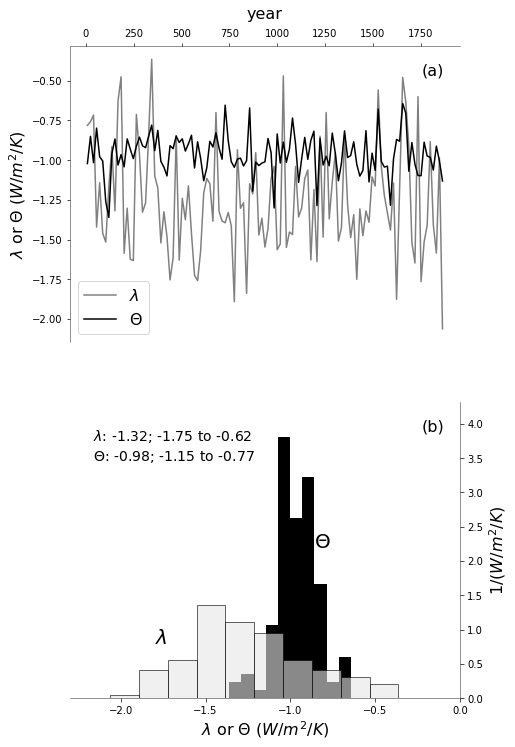

In [8]:
# figure 3 — time series + histogram version
fig, axes = plt.subplots(2, 1, figsize=(7,12))
# plt.subplots_adjust(wspace=0.4)

ax=axes.flatten()[0]
tx=np.arange(len(m1all[0]))*16+8
ax.plot(tx,m1all[0],'0.5',label='$\lambda$');ax.plot(tx,m1all[1],'k',label='$\Theta$')

ax.set_ylabel(r'$\lambda$ or $\Theta$ ($W/m^2/K$)',fontsize=16)
ax.set_xlabel('year',fontsize=16,labelpad=10)
ax.legend(loc=3,fontsize=16)

colorplotLeftTop(ax)

ax=axes.flatten()[1]
m1=m1all[1]

ax.hist(m1,color='k',normed=True)
# ax.axvline(-1.03,color='k',ls='dashed',lw=2) # from MPI climate sensitivity calc

# ax.text(0.06,0.8,'$\Theta$: {:.2f}$\pm${:.2f}, {:.2f}'.format(np.average(m1),np.std(m1),(np.max(m1)-np.min(m1))),\
#         fontsize=16,transform=ax.transAxes)
ax.text(0.06,0.8,'$\Theta$: {:.2f}; {:.2f} to {:.2f}'.format(np.median(m1),np.percentile(m1,5),np.percentile(m1,95)),\
        fontsize=14,transform=ax.transAxes)

m1=m1all[0]
ax.hist(m1,color='0.9',normed=True,alpha=0.6,edgecolor='k')

# ax.axvline(-1.36,color='k',ls='dashed',lw=2) # from MPI climate sensitivity calc

ax.set_xlim(-2.3,0)
# x1=axes[0].get_ylim();axes[0].set_ylim(x1[0],x1[1]*1.1)
    
ax.set_xlabel('$\lambda$ or $\Theta$ ($W/m^2/K$)',fontsize=16)
ax.set_ylabel('1/($W/m^2/K$)',fontsize=16)

# ax.text(0.06,0.9,'$\lambda$: {:.2f}$\pm${:.2f}, {:.2f}'.format(np.average(m1),np.std(m1),(np.max(m1)-np.min(m1))),\
#         fontsize=16,transform=ax.transAxes)
ax.text(0.061,0.87,'$\lambda$: {:.2f}; {:.2f} to {:.2f}'.format(np.median(m1),np.percentile(m1,5),np.percentile(m1,95)),\
        fontsize=14,transform=ax.transAxes)

ax.text(-1.8,0.8,'$\lambda$',fontsize=20)
ax.text(-0.86,2.2,'$\Theta$',fontsize=20)
colorplot(ax)

x1=ax.get_ylim();ax.set_ylim(x1[0],x1[1]*1.08)

for ii,labx in zip(axes.flatten(),'(a),(b)'.split(',')):
    ii.text(0.9,0.9,'{}'.format(labx),\
        fontsize=16,transform=ii.transAxes)

# savefig('fig8.pdf')
# savefig('fig8')

extra plots

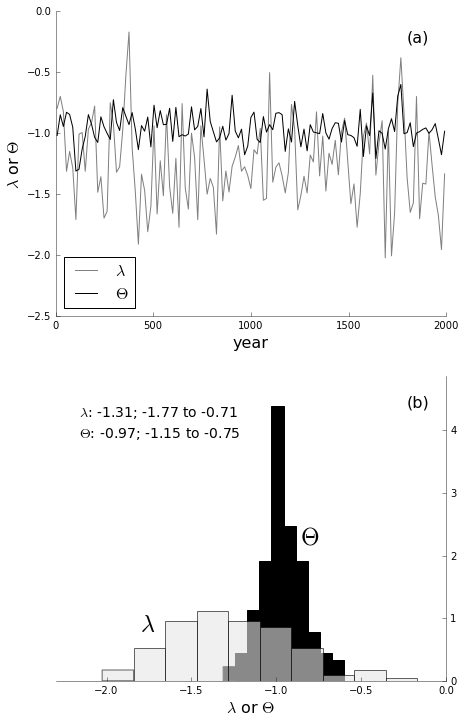

In [6]:
# figure 3 — time series + histogram version
fig, axes = plt.subplots(2, 1, figsize=(7,12))
# plt.subplots_adjust(wspace=0.4)

ax=axes.flatten()[0]
tx=np.arange(len(m1all[0]))*16+8
ax.plot(tx,m1all[0],'0.5',label='$\lambda$');ax.plot(tx,m1all[1],'k',label='$\Theta$')

ax.set_ylabel('$\lambda$ or $\Theta$',fontsize=16)
ax.set_xlabel('year',fontsize=16)
ax.legend(loc=3,fontsize=16)

colorplotLeft(ax)

ax=axes.flatten()[1]
m1=m1all[1]

ax.hist(m1,color='k',normed=True)
# ax.axvline(-1.03,color='k',ls='dashed',lw=2) # from MPI climate sensitivity calc

# ax.text(0.06,0.8,'$\Theta$: {:.2f}$\pm${:.2f}, {:.2f}'.format(np.average(m1),np.std(m1),(np.max(m1)-np.min(m1))),\
#         fontsize=16,transform=ax.transAxes)
ax.text(0.06,0.8,'$\Theta$: {:.2f}; {:.2f} to {:.2f}'.format(np.median(m1),np.percentile(m1,5),np.percentile(m1,95)),\
        fontsize=14,transform=ax.transAxes)

m1=m1all[0]
ax.hist(m1,color='0.9',normed=True,alpha=0.6)

# ax.axvline(-1.36,color='k',ls='dashed',lw=2) # from MPI climate sensitivity calc

ax.set_xlim(-2.3,0)
# x1=axes[0].get_ylim();axes[0].set_ylim(x1[0],x1[1]*1.1)
    
ax.set_xlabel('$\lambda$ or $\Theta$',fontsize=16)

# ax.text(0.06,0.9,'$\lambda$: {:.2f}$\pm${:.2f}, {:.2f}'.format(np.average(m1),np.std(m1),(np.max(m1)-np.min(m1))),\
#         fontsize=16,transform=ax.transAxes)
ax.text(0.061,0.87,'$\lambda$: {:.2f}; {:.2f} to {:.2f}'.format(np.median(m1),np.percentile(m1,5),np.percentile(m1,95)),\
        fontsize=14,transform=ax.transAxes)

ax.text(-1.8,0.8,'$\lambda$',fontsize=24)
ax.text(-0.86,2.2,'$\Theta$',fontsize=24)
colorplot(ax)

x1=ax.get_ylim();ax.set_ylim(x1[0],x1[1]*1.08)

for ii,labx in zip(axes.flatten(),'(a),(b)'.split(',')):
    ii.text(0.9,0.9,'{}'.format(labx),\
        fontsize=16,transform=ii.transAxes)

# savefig('fig4.pdf')

look at tropical surface T and global avg. 500-hPa T

In [7]:
skip=16*12;length=16;s=len(modout[1].t)

## analyze
print 'analyzing ...',
m1all=[]
for latr,varn in zip(['30','90'],['ts','t']):
	
	mod1=modout[1] # control run

	tvar=varn
	if latr == '30': tvar = tvar+'trop'
	commandStr='tg=mod1.{}'.format(tvar)
	exec(commandStr)

	# flux is the same for all calcs
	flux=mod1.flux
	
	m1=[]
	for ii in range(0,s-length*12,skip):
		indx=range(ii,ii+length*12)
		fitx=stats.linregress(anomaly(tg[indx]),anomaly(flux[indx]))
		m1.append(fitx[0])

	m1all.append(m1)

print
m1time=np.arange(len(m1))*skip/12.+length/2

analyzing ...


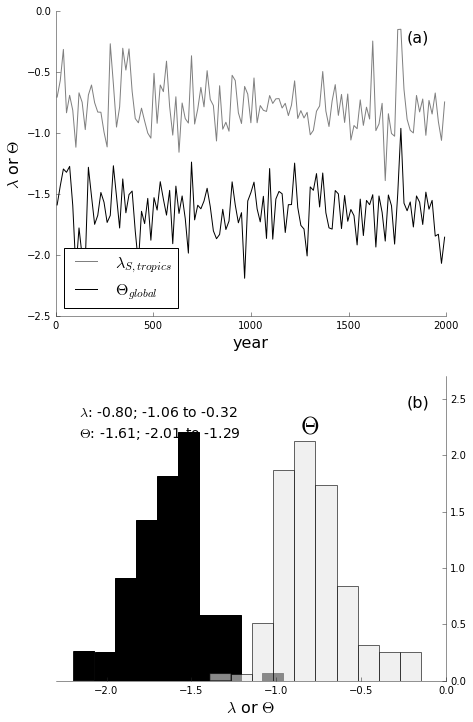

In [9]:
# figure S4 — histogram version
fig, axes = plt.subplots(2, 1, figsize=(7,12))
# plt.subplots_adjust(wspace=0.4)

ax=axes.flatten()[0]
tx=np.arange(len(m1all[0]))*16+8
ax.plot(tx,m1all[0],'0.5',label='$\lambda_{S,tropics}$');ax.plot(tx,m1all[1],'k',label='$\Theta_{global}$')

ax.set_ylabel('$\lambda$ or $\Theta$',fontsize=16)
ax.set_xlabel('year',fontsize=16)
ax.legend(loc=3,fontsize=16)

colorplotLeft(ax)

ax=axes.flatten()[1]
m1=m1all[1]

ax.hist(m1,color='k',normed=True)
# ax.axvline(-1.03,color='k',ls='dashed',lw=2) # from MPI climate sensitivity calc

# ax.text(0.06,0.8,'$\Theta$: {:.2f}$\pm${:.2f}, {:.2f}'.format(np.average(m1),np.std(m1),(np.max(m1)-np.min(m1))),\
#         fontsize=16,transform=ax.transAxes)
ax.text(0.06,0.8,'$\Theta$: {:.2f}; {:.2f} to {:.2f}'.format(np.median(m1),np.percentile(m1,5),np.percentile(m1,95)),\
        fontsize=14,transform=ax.transAxes)

m1=m1all[0]
ax.hist(m1,color='0.9',normed=True,alpha=0.6)

# ax.axvline(-1.36,color='k',ls='dashed',lw=2) # from MPI climate sensitivity calc

ax.set_xlim(-2.3,0)
# x1=axes[0].get_ylim();axes[0].set_ylim(x1[0],x1[1]*1.1)
    
ax.set_xlabel('$\lambda$ or $\Theta$',fontsize=16)

# ax.text(0.06,0.9,'$\lambda$: {:.2f}$\pm${:.2f}, {:.2f}'.format(np.average(m1),np.std(m1),(np.max(m1)-np.min(m1))),\
#         fontsize=16,transform=ax.transAxes)
ax.text(0.061,0.87,'$\lambda$: {:.2f}; {:.2f} to {:.2f}'.format(np.median(m1),np.percentile(m1,5),np.percentile(m1,95)),\
        fontsize=14,transform=ax.transAxes)

ax.text(-1.8,0.8,'$\lambda$',fontsize=24)
ax.text(-0.86,2.2,'$\Theta$',fontsize=24)
colorplot(ax)

x1=ax.get_ylim();ax.set_ylim(x1[0],x1[1]*1.08)

for ii,labx in zip(axes.flatten(),'(a),(b)'.split(',')):
    ii.text(0.9,0.9,'{}'.format(labx),\
        fontsize=16,transform=ii.transAxes)